In [190]:
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

from tesspy import Tessellation

# carregando arquivos

In [191]:
df_fortaleza_hexagons = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.csv', sep = ';')

<>:1: SyntaxWarning:

invalid escape sequence '\A'

<>:1: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7612\2851811351.py:1: SyntaxWarning:

invalid escape sequence '\A'



# mapa de fortaleza

In [192]:
Fortaleza = Tessellation("Fortaleza")
Fortaleza_polygon = Fortaleza.get_polygon()

Text(0.5, 1.0, 'Fortaleza')

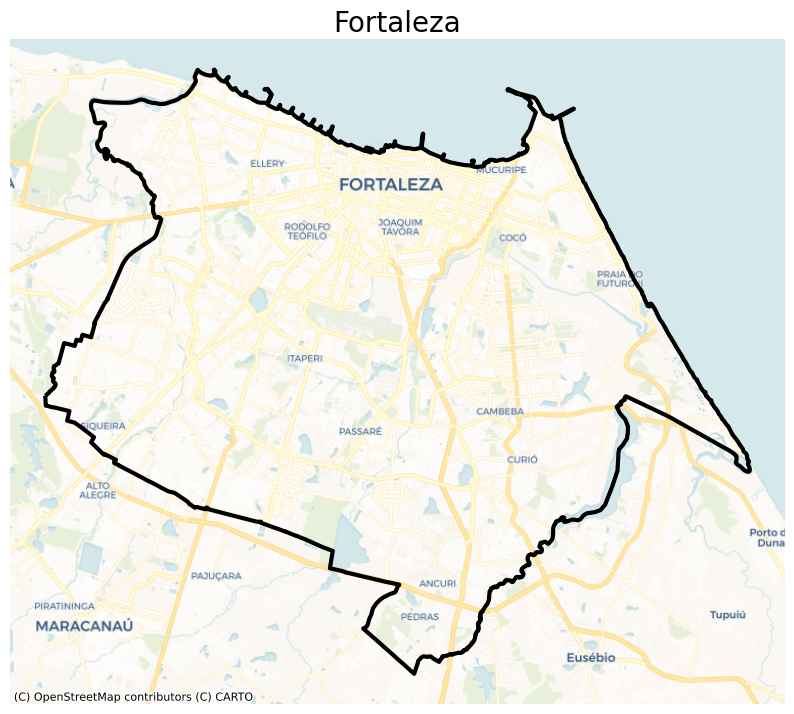

In [193]:
fig, ax = plt.subplots(figsize=(10,15))


Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

# Contagem de canis

In [194]:
df_lat_lon = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\df_lat_lon.csv', sep = ';')

<>:1: SyntaxWarning:

invalid escape sequence '\A'

<>:1: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7612\2773533858.py:1: SyntaxWarning:

invalid escape sequence '\A'



In [195]:
cnae = len(df_lat_lon['CNAE FISCAL PRINCIPAL'].drop_duplicates())

In [196]:
print(f"No denreco selecionado contem **{cnae}** CNAIS(s) distintos")

No denreco selecionado contem **64** CNAIS(s) distintos


In [197]:
cnpj = len(df_lat_lon['CNPJ BÁSICO'].drop_duplicates())

In [198]:
print("No denreco selecionado contem {} CNPJ(s) Básicos distintos".format(cnpj))

No denreco selecionado contem 14496 CNPJ(s) Básicos distintos


# Grafico barras

In [199]:
df_zona = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\df_zona_cnae.csv', sep = ';')

<>:1: SyntaxWarning:

invalid escape sequence '\A'

<>:1: SyntaxWarning:

invalid escape sequence '\A'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7612\1860192310.py:1: SyntaxWarning:

invalid escape sequence '\A'



In [202]:
df_zona.loc['Total'] = df_zona.sum(axis=0)

In [203]:
df_totais_fortaleza = pd.DataFrame(df_zona.loc['Total'].sort_values(ascending=False))

In [214]:
type(df_lat_lon['CNAE FISCAL PRINCIPAL'][0])

numpy.int64

In [204]:
lista_cnais = list(df_totais_fortaleza.index)
lista_valores = list(df_totais_fortaleza['Total'])

In [205]:
lista_valores = list(df_totais_fortaleza['Total'])

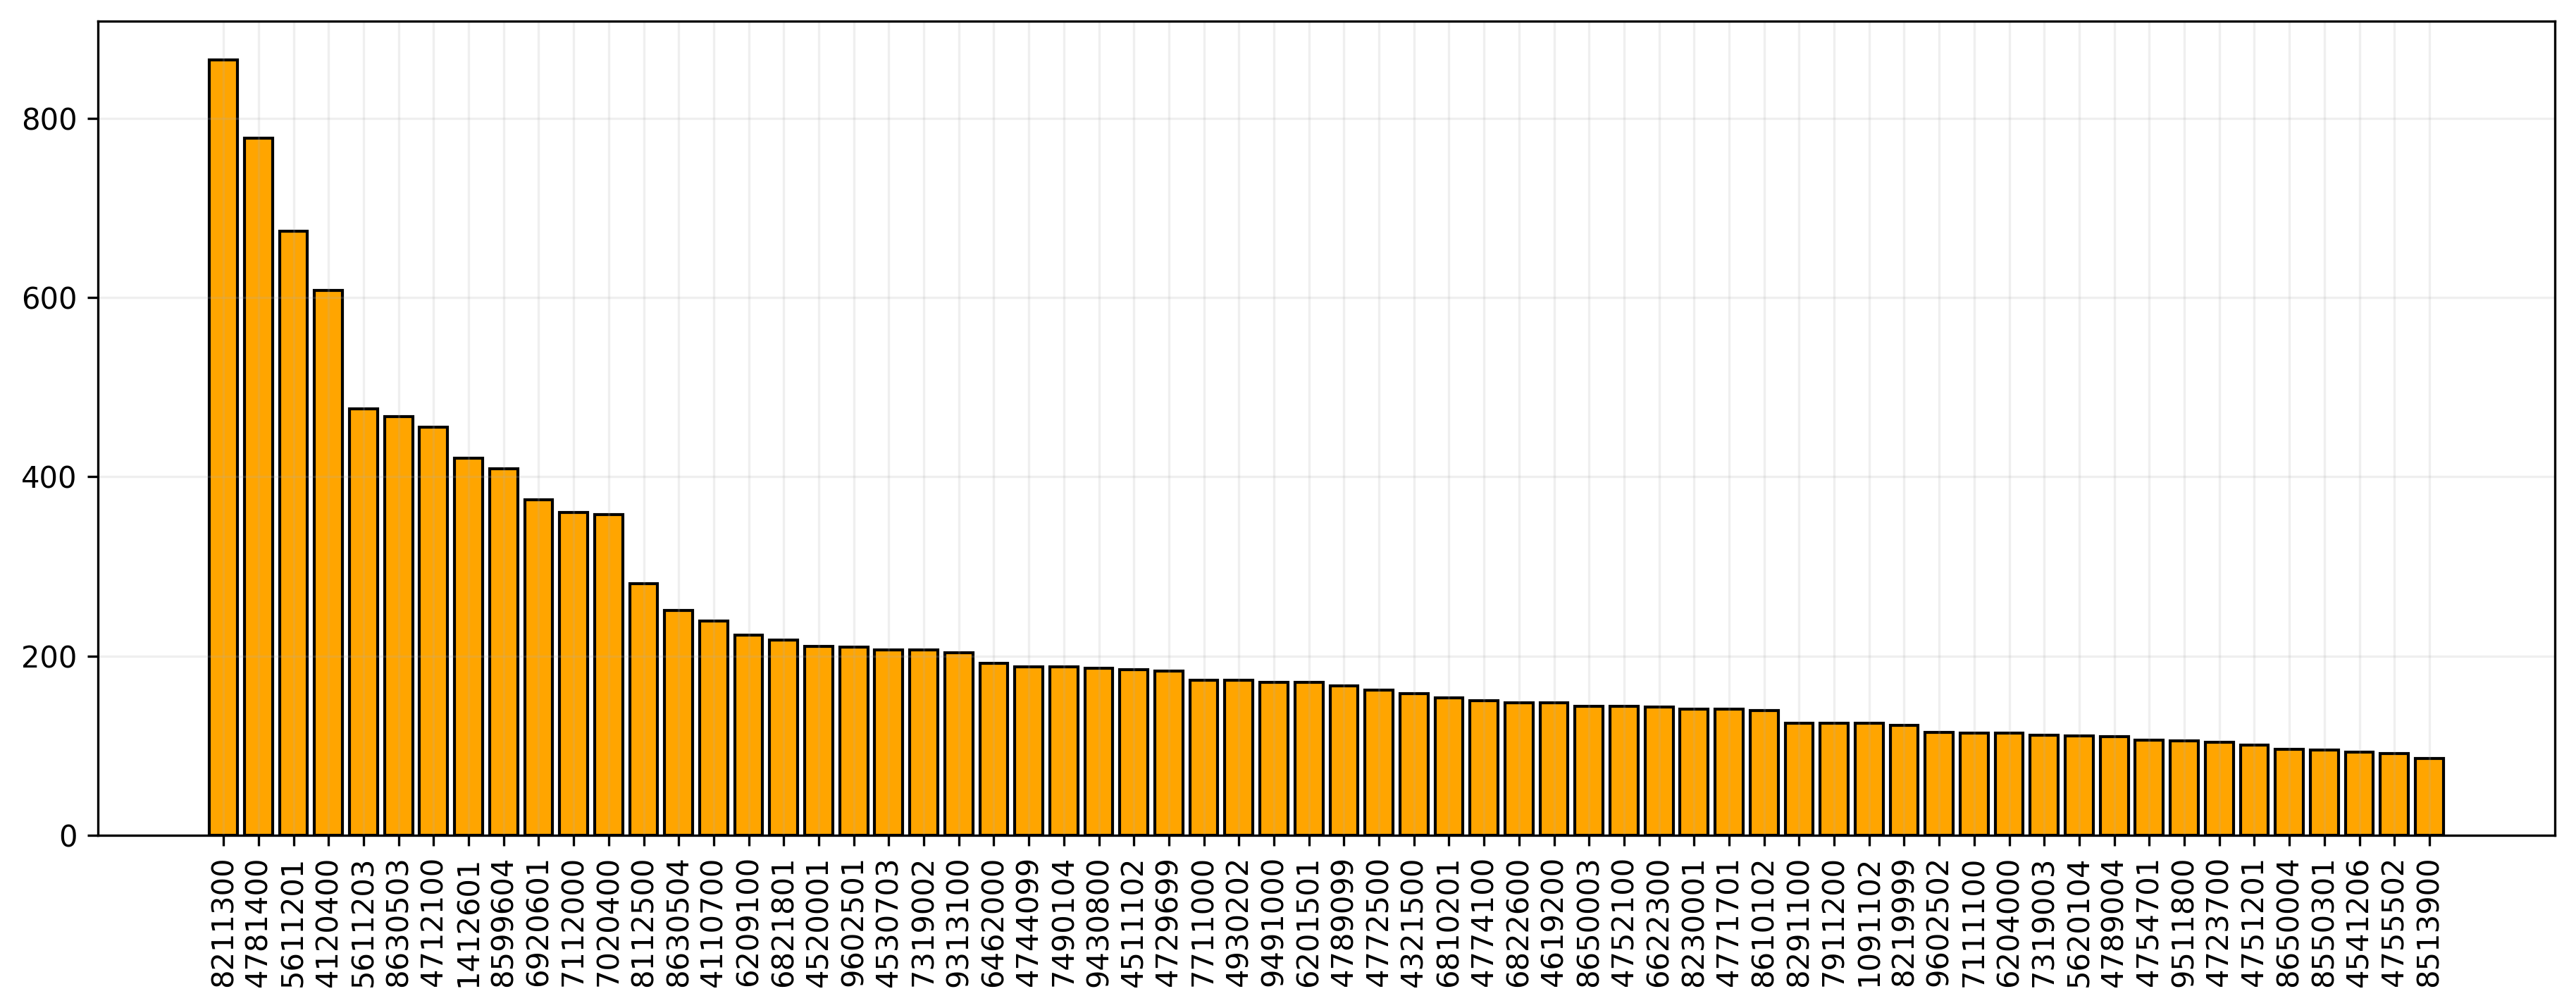

In [206]:
plt.figure(dpi=300,figsize=(15,5))

plt.bar(lista_cnais, lista_valores,edgecolor='black',color='orange')
plt.xticks(rotation=90)
plt.grid(alpha=0.2)

In [207]:
import plotly.express as px

fig = px.bar(x=lista_cnais, y=lista_valores)
fig.update_xaxes(tickangle=90)
fig.update_layout(title='Gráfico de Barras dos CNAIs Mais Utilizados em Fortaleza', xaxis_title='Lista de CNAIs', yaxis_title='Quantidades')

fig.show()

In [ ]:
type(lista_cnais[0])

## Legendas 

In [ ]:
# import spacy 
# import numpy as np 
# import string
# from tqdm import tqdm 
# from spacy.lang.pt.stop_words import STOP_WORDS

In [ ]:
# pln=spacy.load('pt_core_news_sm')
# stop_words=STOP_WORDS
# pontuacoes=string.punctuation
# pontuacoes=pontuacoes+"..."+" "
# stop_words.add('e')

In [ ]:
# lista_cnai = list(df_lat_lon['CNAE FISCAL PRINCIPAL'])

In [ ]:
# def processamento(texto):
#     # texto em minuscula
#     texto=texto.lower()
#     documento=pln(texto)
    
#     #removendo stop words
#     lista_tokens_1=[]
#     for p in documento:
#         if (p.text in stop_words)==False:
#             lista_tokens_1.append(p)
#     #removendo pontuações      
#     lista_tokens_2=[]
#     for p in lista_tokens_1:
#         if (p.text in pontuacoes)==False:
#             lista_tokens_2.append(p.text)
#     #lematização de tokens        
# #     lista_tokens_3=[]
# #     for p in lista_tokens_2:
# #         lista_tokens_3.append(p.lemma_)

#     return lista_tokens_2

In [ ]:
# lista_cnai = pd.Series(lista_cnai).drop_duplicates()

In [ ]:
# listatextos=[]

# for c in tqdm(lista_cnai):
#     texto=' '
#     for t in df_lat_lon[df_lat_lon['CNAE FISCAL PRINCIPAL']==c]['NOME FANTASIA'].values:
#         texto=texto+' '+t
#     listatextos.append(processamento(texto))

In [ ]:
# empreendimento=[]
# for i in range(len(listatextos)):
#     if i != ' ':
#         n1=pd.Series(listatextos[i]).value_counts().index[0]
#         n2=pd.Series(listatextos[i]).value_counts().index[1]
#         n3=pd.Series(listatextos[i]).value_counts().index[2]
#         nome=n1+' '+n2+' '+n3
#         empreendimento.append(nome)

In [ ]:
# pd.Series(empreendimento).value_counts()

In [ ]:
# cnai=pd.DataFrame({'CNAE FISCAL PRINCIPAL':lista_cnai,'TIPO':empreendimento})
# cnai

In [ ]:
# cnai=pd.DataFrame({'CNAE FISCAL PRINCIPAL':listacnais,'TIPO':empreendimento})
# cnai

In [ ]:
# len(df_lat_lon)

In [ ]:
# df_lat_lon = pd.merge(df_lat_lon, cnai, how = 'inner', on = 'CNAE FISCAL PRINCIPAL')

In [ ]:
# df_lat_lon

In [ ]:
# df_lat_lon.to_csv('D:\AEY HELTH\harquivos_streamlit\df_lat_lon.csv', sep = ';')

## Filtrando pelo endereco ##

In [ ]:
media=df_zona.mean().values
std=df_zona.std()

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable
from shapely.geometry import Point, Polygon
import geopandas as gpd

In [ ]:
df_fortaleza_hexagons = pd.read_csv('D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.csv', sep = ';')

In [ ]:
df_fortaleza_hexagons = gpd.read_file(r'D:\AEY HELTH\harquivos_streamlit\Fortaleza_hexagons.shp')

In [ ]:
df_fortaleza_hexagons

In [ ]:
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode('Rua Adail teixeira 110')

In [ ]:
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode('Rua Adail teixeira 110')
if location:
    latitude = location.latitude
    longitude = location.longitude
    ponto = Point(longitude, latitude)
    for index, row in df_fortaleza_hexagons[['geometry','Zonas']].iterrows():
        if row['geometry'].contains(ponto):
            print(f'O emderco esta contido na Zona {row['Zonas']}')
            zona_encontrada = row['geometry']
            nome_zona = row['Zonas']
            break
    df_filtrado_zona = df_lat_lon[df_lat_lon['Zonas'] == nome_zona]
    cnae = len(df_filtrado_zona['CNAE FISCAL PRINCIPAL'].drop_duplicates())
    print(f"No denreco selecionado contem {cnae} CNAIS(s) distintos")
    cnpj = len(df_filtrado_zona['CNPJ BÁSICO'].drop_duplicates())
    print("No denreco selecionado contem {} CNPJ(s) Básicos distintos".format(cnpj))
    
    fig, ax = plt.subplots(figsize=(10,15))
    df_fortaleza_hexagons[df_fortaleza_hexagons['geometry'] == row['geometry']]['geometry'].to_crs("EPSG:3857").plot(ax=ax, facecolor='none', edgecolor="k", lw=1)
    # df_fortaleza_hexagons['geometry'].to_crs("EPSG:3857")
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title("Fortaleza", fontsize=20)
    plt.show()

    x = df_zona[df_zona.index == row['Zonas']]
    resultado=(x-media)/std
    daux = pd.DataFrame(resultado).T
    daux = daux.rename(columns={daux.columns[0]: 'Z'}).sort_values('Z')
    lista_cnais = list(daux.index)
    lista_valores = list(daux['Z'])
    print(type(lista_cnais[0]))

    fig = px.bar(x=lista_cnais, y=lista_valores)
    fig.update_xaxes(tickangle=90)
    fig.update_layout(title='Gráfico de Barras dos CNAIs Mais Utilizados em Fortaleza', xaxis_title='Lista de CNAIs', yaxis_title='Quantidades')

    fig.show()

else:
    print('Endereço não encontrad')

In [ ]:
df_fortaleza_hexagons

In [ ]:
daux = pd.merge(daux, )

In [ ]:
df_nomes_fantasia['CNAE FISCAL PRINCIPAL'] = df_nomes_fantasia['CNAE FISCAL PRINCIPAL'].to_string()

In [ ]:
df_nomes_fantasia['CNAE FISCAL PRINCIPAL']

In [ ]:
len(daux.index)

In [ ]:
df_nomes_fantasia

In [ ]:
df_filtrado_zona = df_lat_lon[df_lat_lon['Zonas'] == nome_zona]
cnae = len(df_filtrado_zona['CNAE FISCAL PRINCIPAL'].drop_duplicates())
print(f"No denreco selecionado contem {cnae} CNAIS(s) distintos")
cnpj = len(df_filtrado_zona['CNPJ BÁSICO'].drop_duplicates())
print("No denreco selecionado contem {} CNPJ(s) Básicos distintos".format(cnpj))



In [ ]:
x = df_zona[df_zona.index == row['Zonas']]
resultado=(x-media)/std
resultado
daux = pd.DataFrame(resultado).T
daux = daux.rename(columns={daux.columns[0]: 'Z'}).sort_values('Z')

In [ ]:
daux

In [ ]:
row['geometry']